# Anyone AI

# Project III - Home Credit Default Risk

You've been learning a lot about Machine Learning Algorithms, now we you're gonna be asked to put it all together. 

You will create a complete pipeline to preprocess the data, train your model and then predict values for the [Home Credit Default Risk](https://www.kaggle.com/competitions/home-credit-default-risk/) Kaggle competition.

## Introduction

Kaggle is a web platform and community for data scientist and machine learning engineers where competetitions and datasets are regularly published.

This particular competition is a binary Classification task: we want to predict whether the person applying for a home credit will be able to repay its debt or not. The competition finished 4 years ago, so you will find a lot of blog posts and code written for it, we encourage you to read everything you can about it.

The dataset is composed of multiple files with different information about loands taken. In this project we're going to exclusively work with the main files: application_train.csv and application_test.csv.

The competition uses [Area Under the ROC Curve](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=es_419) as the evaluation metric, so our models will have to return the probabilities that a loan is not paid for each row.

### Getting the data

In [2]:
import pandas as pd
import IPython.display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import QuantileTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

1- Login to Kaggle (if you don't have an account you'll have to register to get it) and download the [complete dataset](https://www.kaggle.com/competitions/home-credit-default-risk/data). Read the information about the data. What does a row in the main file represent? What does the target variable means?

One row represents one loan in our data sample.
The target variable says wether the loan was repaid (0) or not (1)

2- Load the training and test datasets, we're only going to work withe "application_train.csv" and "application_test.csv" for now

In [66]:
from google.colab import drive
drive.mount('/content/drive')  

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
'''
Loading the dataset: Read CSV uploaded in Drive
'''

application_train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/03 - Sprint/Final/application_train.csv') 
application_test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/03 - Sprint/Final/application_test.csv')

### Exploratory Data Analysis

A lot of the analysis of the data can be found on public available Kaggle kernels or blog posts, but you need to make sure you understand the datasets properties before starting working on it, so we'll do exploratory data analysis for the main files

**Dataset Basics**

1- Show the shape of the training and test datasets.

In [68]:
'''
Shape of the dataset
'''

print(f"Train: {(application_train_df).shape}")
print(f"Train: {(application_test_df).shape}")

Train: (307511, 122)
Train: (48744, 121)


2- List all columns in the train dataset

In [69]:
'''
Check train set
'''

application_train_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
'''
Show all columns in the training dataset:
For printing columns, I used a python library
'''

IPython.display.HTML(pd.DataFrame(application_train_df.columns).to_html())

,0
0,SK_ID_CURR
1,TARGET
2,NAME_CONTRACT_TYPE
3,CODE_GENDER
4,FLAG_OWN_CAR
5,FLAG_OWN_REALTY
6,CNT_CHILDREN
7,AMT_INCOME_TOTAL
8,AMT_CREDIT
9,AMT_ANNUITY


In [71]:
enumerate_columns = application_train_df.columns

first = 0
for i in enumerate_columns:
  first+=1
  print(f"{first} - {i}")


1 - SK_ID_CURR
2 - TARGET
3 - NAME_CONTRACT_TYPE
4 - CODE_GENDER
5 - FLAG_OWN_CAR
6 - FLAG_OWN_REALTY
7 - CNT_CHILDREN
8 - AMT_INCOME_TOTAL
9 - AMT_CREDIT
10 - AMT_ANNUITY
11 - AMT_GOODS_PRICE
12 - NAME_TYPE_SUITE
13 - NAME_INCOME_TYPE
14 - NAME_EDUCATION_TYPE
15 - NAME_FAMILY_STATUS
16 - NAME_HOUSING_TYPE
17 - REGION_POPULATION_RELATIVE
18 - DAYS_BIRTH
19 - DAYS_EMPLOYED
20 - DAYS_REGISTRATION
21 - DAYS_ID_PUBLISH
22 - OWN_CAR_AGE
23 - FLAG_MOBIL
24 - FLAG_EMP_PHONE
25 - FLAG_WORK_PHONE
26 - FLAG_CONT_MOBILE
27 - FLAG_PHONE
28 - FLAG_EMAIL
29 - OCCUPATION_TYPE
30 - CNT_FAM_MEMBERS
31 - REGION_RATING_CLIENT
32 - REGION_RATING_CLIENT_W_CITY
33 - WEEKDAY_APPR_PROCESS_START
34 - HOUR_APPR_PROCESS_START
35 - REG_REGION_NOT_LIVE_REGION
36 - REG_REGION_NOT_WORK_REGION
37 - LIVE_REGION_NOT_WORK_REGION
38 - REG_CITY_NOT_LIVE_CITY
39 - REG_CITY_NOT_WORK_CITY
40 - LIVE_CITY_NOT_WORK_CITY
41 - ORGANIZATION_TYPE
42 - EXT_SOURCE_1
43 - EXT_SOURCE_2
44 - EXT_SOURCE_3
45 - APARTMENTS_AVG
46 - BASEMEN

3- Show the first 5 records of the training dataset, transpose the dataframe to see each record as a column and features as rows, make sure all features are visualized. Take your time to review what kind of information you can gather from this data.

In [72]:
### Complete in this cell: show first 5 records in a transposed table
'''
First transpose m x train and save it into a new df
Iloc the first 5 columns of my df traspose
Source: https://stackoverflow.com/questions/30673684/pandas-dataframe-first-x-columns
'''

application_train_df_t = application_train_df.T
application_train_df_t = application_train_df_t.iloc[:,:5]
application_train_df_t

,0,1,2,3,4
SK_ID_CURR,100002,100003,100004,100006,100007
TARGET,1,0,0,0,0
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Revolving loans,Cash loans,Cash loans
CODE_GENDER,M,F,M,F,M
FLAG_OWN_CAR,N,N,Y,N,N
...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,0.0,0.0,0.0,NaN,0.0
AMT_REQ_CREDIT_BUREAU_WEEK,0.0,0.0,0.0,NaN,0.0
AMT_REQ_CREDIT_BUREAU_MON,0.0,0.0,0.0,NaN,0.0
AMT_REQ_CREDIT_BUREAU_QRT,0.0,0.0,0.0,NaN,0.0


In [73]:
'''
Complete set with Python's display.HTML library
'''

IPython.display.HTML(application_train_df_t.to_html())

,0,1,2,3,4
SK_ID_CURR,100002,100003,100004,100006,100007
TARGET,1,0,0,0,0
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Revolving loans,Cash loans,Cash loans
CODE_GENDER,M,F,M,F,M
FLAG_OWN_CAR,N,N,Y,N,N
FLAG_OWN_REALTY,Y,N,Y,Y,Y
CNT_CHILDREN,0,0,0,0,0
AMT_INCOME_TOTAL,202500.0,270000.0,67500.0,135000.0,121500.0
AMT_CREDIT,406597.5,1293502.5,135000.0,312682.5,513000.0
AMT_ANNUITY,24700.5,35698.5,6750.0,29686.5,21865.5


4- Show the distribution of the target variable values: print the total value count and the percentage of each value, plot this relationship.

0    282686
1     24825
Name: TARGET, dtype: int64
0    92.0
1     8.0
Name: TARGET, dtype: float64


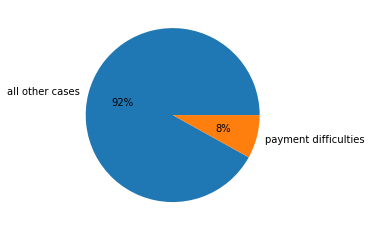

In [74]:
### Complete in this cell: show distribution of target variable

'''
How many 1 and 0 are
'''
values = application_train_df['TARGET'].value_counts()

'''
Percentage: Normalize "true" brings the % regarding the total amount of values within the column of each type
'''
target_percent = round(application_train_df['TARGET'].value_counts(normalize = True)*100)


'''
Labels for ploting
'''
labels = ["all other cases","payment difficulties"]


print(values)
print(target_percent)


plt.pie(x = values, labels = labels ,autopct='%.0f%%')
plt.show()



#print(f"{round(application_train_df['TARGET'].value_counts(normalize = True)*100)}")

5- Show the number of columns of each data type

In [75]:
### Complete in this cell: show number of columns per data type
'''
Value count the dtypes of the column
'''

application_train_df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

6- For categorical variables, show the number of distinct values in each column (number of labels)

In [76]:
'''
Data types in each column, showing amount of distinct values
'''

CompleteInfo = application_train_df.T
CompleteInfo["types"] = application_train_df.dtypes
CompleteInfo["Min"] = application_train_df.min()
CompleteInfo["Max"] = application_train_df.max()
CompleteInfo["Unics"] = application_train_df.nunique()
CompleteInfo = CompleteInfo[["types","Min", "Max", "Unics"]]
IPython.display.HTML(pd.DataFrame(CompleteInfo).to_html())


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,types,Min,Max,Unics
SK_ID_CURR,int64,100002,456255,307511
TARGET,int64,0,1,2
NAME_CONTRACT_TYPE,object,Cash loans,Revolving loans,2
CODE_GENDER,object,F,XNA,3
FLAG_OWN_CAR,object,N,Y,2
FLAG_OWN_REALTY,object,N,Y,2
CNT_CHILDREN,int64,0,19,15
AMT_INCOME_TOTAL,float64,25650.0,117000000.0,2548
AMT_CREDIT,float64,45000.0,4050000.0,5603
AMT_ANNUITY,float64,1615.5,258025.5,13672


In [77]:
### Complete in this cell: show number of unique values per categorical column

'''
Show only the "object" type of features
Unique shows the unique values, the nunique counts how many uniques values are in that column
'''
application_train_df.select_dtypes(include = ['object']).nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

7- Analyzing missing data: show the percentage of missing data for each column ordered by percentage descending (show only the 20 columns with higher missing pct)

In [78]:
### Complete in this cell: checking missing data
application_train_df.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [79]:
'''
New DF equals to my transpose df
create a new column with the missing date sum of each column
create a new column with the % of that missing data
sort values by % column and only shows the first 20 rows
'''

CompleteInfo = application_train_df.T
CompleteInfo["Missing_data"] = application_train_df.isnull().sum()
CompleteInfo["%"] = round(application_train_df.isnull().sum()*100/len(application_train_df),3)
CompleteInfo = CompleteInfo.sort_values (by = "%", ascending = False).head(20)
CompleteInfo[["Missing_data","%"]]

,Missing_data,%
COMMONAREA_MEDI,214865,69.872
COMMONAREA_AVG,214865,69.872
COMMONAREA_MODE,214865,69.872
NONLIVINGAPARTMENTS_MODE,213514,69.433
NONLIVINGAPARTMENTS_AVG,213514,69.433
NONLIVINGAPARTMENTS_MEDI,213514,69.433
FONDKAPREMONT_MODE,210295,68.386
LIVINGAPARTMENTS_MODE,210199,68.355
LIVINGAPARTMENTS_AVG,210199,68.355
LIVINGAPARTMENTS_MEDI,210199,68.355


**Analyzing distribution of variables**

1- Show the distribution of credit amounts

<Figure size 1000x600 with 0 Axes>

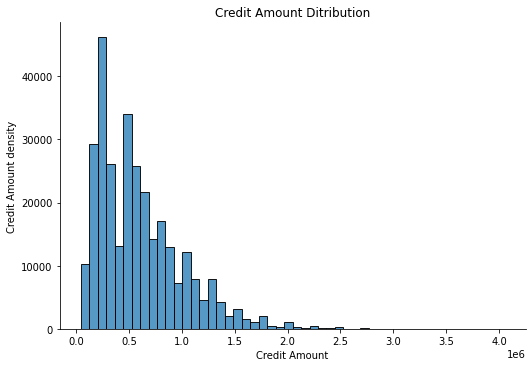

In [80]:
### Complete in this cell: distribution of credit amounts

plt.figure(figsize = (5,3), dpi = 200)
sns.displot(data = application_train_df, x ="AMT_CREDIT", bins = 50, fill = True, height = 5, aspect = 1.5).set(title = 'Credit Amount Ditribution')
plt.xlabel('Credit Amount', fontsize = 10)
plt.ylabel('Credit Amount density', fontsize = 10)
plt.show()

2- Plot the education level of the credit applicants, show the percentages of each category. Also print the total counts for each category.

In [81]:
level_education = application_train_df["NAME_EDUCATION_TYPE"].unique()
level_education

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [82]:
percentage_level = round(application_train_df["NAME_EDUCATION_TYPE"].value_counts()*100/ len(application_train_df),3)
percentage_level

Secondary / secondary special    71.019
Higher education                 24.345
Incomplete higher                 3.342
Lower secondary                   1.241
Academic degree                   0.053
Name: NAME_EDUCATION_TYPE, dtype: float64

<Figure size 1800x600 with 0 Axes>

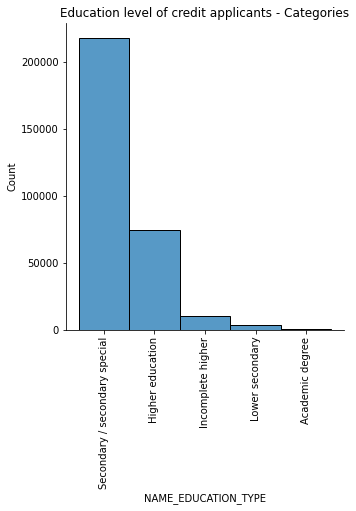

In [83]:
### Complete in this cell: level of education plot

plt.figure(figsize = (9,3), dpi = 200)
sns.displot(data=application_train_df, x="NAME_EDUCATION_TYPE", height= 5)
plt.xticks(rotation = 90)
plt.title('Education level of credit applicants - Categories')
plt.show()

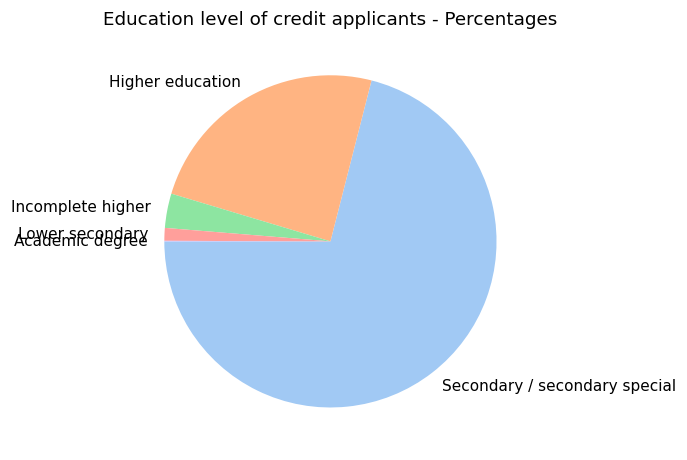

In [84]:
percentage_level = round(application_train_df["NAME_EDUCATION_TYPE"].value_counts()*100/ len(application_train_df),3)
colors=sns.color_palette('pastel')

plt.figure(figsize=(5,5), dpi = 110)
plt.pie(percentage_level, labels = percentage_level.index, colors = colors, labeldistance = 1.1, startangle=180)
plt.title('Education level of credit applicants - Percentages')

plt.show()

3- Plot the distribution of ocupation of the loan applicants

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

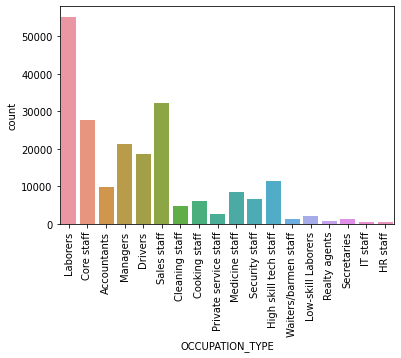

In [85]:
### Complete in this cell: ocupation of applicants

sns.countplot(data = application_train_df, x = "OCCUPATION_TYPE", fill=True)
plt.xticks(rotation = 90)

4- Plot the family status of the applicants

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

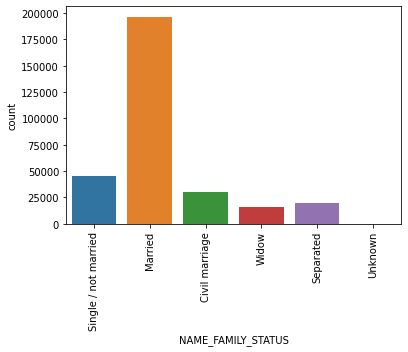

In [86]:
### Complete in this cell: family status

sns.countplot(data = application_train_df, x = "NAME_FAMILY_STATUS")
plt.xticks(rotation = 90)

5- Plot the income type of applicants grouped by the target variable

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

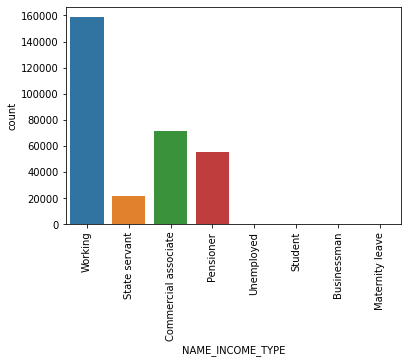

In [87]:
### Complete in this cell: Income type of applicants by target variable

sns.countplot(data = application_train_df, x = "NAME_INCOME_TYPE", fill=True)
plt.xticks(rotation = 90)


## Preprocessing

In this section, you will code a function to make all the data pre processing for the dataset. What you have to deliver is a function that takes the train and test dataframes, processes all features, and returns the transformed data as numpy arrays ready to be used for training.

The function should perform these activities:

- Correct outliers/anomalous values in numerical columns (hint: take a look at the DAYS_EMPLOYED column)
- Impute values for all columns with missing data (use median as imputing value)
- Encode categorical features:
    - If feature has 2 categories encode using binary encoding
    - More than 2 categories, use one hot encoding 
- Feature scaling

Keep in mind that you could get different number of columns in train and test because some category could only be present in one of the dataframes, this could create more one hot encoded columns. You should align train and test to have the same number of columns

In [22]:
'''
Call sets 
'''

application_train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/03 - Sprint/Final/application_train.csv') 
application_test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/03 - Sprint/Final/application_test.csv')

In [239]:
'''
check how many outlairs the column "days employed" have in the X train
'''

application_train_df.loc[application_train_df["DAYS_EMPLOYED"]>=0, ["DAYS_EMPLOYED"]]

,DAYS_EMPLOYED
8,365243
11,365243
23,365243
38,365243
43,365243
...,...
307469,365243
307483,365243
307487,365243
307505,365243


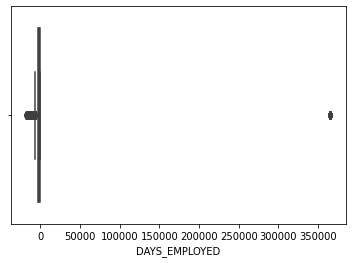

In [240]:
sns.boxplot(data = application_train_df, x = "DAYS_EMPLOYED")
plt.show()

In [4]:
'''
Check the importance of this outliers in the dataset (X_train)
As there are 18% of the complete set, and media, in this case, is not a correct measure to replace values
I will choose median value to replace them
'''

a = len(application_train_df.loc[application_train_df["DAYS_EMPLOYED"]>=0])
b = len(application_train_df)
print(f"{(a/b)*100}")

18.007811102692262


In [23]:
def nan(X_df):
  '''
  Create a function to replace all outliers with nan:

  Create a mask where days employed is >0 (pandas series, with T / F)
  Then with "loc" bring the columns where the mask is true
  Coma, only the column "days_employed"
  Then, to that visualization of the DF replace values with np nan
  Return is not necessary bc i'm rewriting my df, so when calling the function i only call "-funcion"(df)-"
  '''

  mask = X_df["DAYS_EMPLOYED"]>=0
  X_df.loc[mask, "DAYS_EMPLOYED"] = np.nan

  return(X_df)

In [6]:
'''
Check data:
'''

application_train_df = nan(application_train_df)
application_train_df["DAYS_EMPLOYED"].sort_values(ascending = False)

246105   -1.0
161893   -2.0
111965   -2.0
239303   -3.0
239079   -3.0
         ... 
307469    NaN
307483    NaN
307487    NaN
307505    NaN
307507    NaN
Name: DAYS_EMPLOYED, Length: 307511, dtype: float64

In [7]:
'''
check how many outlairs the column "AMT INCOME TOTAL" have in X train
'''

application_train_df["AMT_INCOME_TOTAL"].sort_values(ascending = False)

12840     117000000.0
203693     18000090.0
246858     13500000.0
77768       9000000.0
131127      6750000.0
             ...     
240137        26100.0
186643        26100.0
246104        26100.0
20727         25650.0
1678          25650.0
Name: AMT_INCOME_TOTAL, Length: 307511, dtype: float64

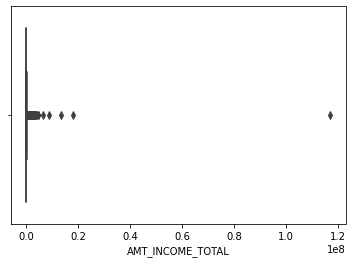

In [245]:
sns.boxplot(data = application_train_df, x = "AMT_INCOME_TOTAL")
plt.show()

In [24]:
'''
Create a function to replace AMT INCOME TOTAL outlier, to my mind the max amount
of income it was a typing error
'''

def salary(X_df):
  mask = X_df["AMT_INCOME_TOTAL"]>=100000000
  X_df.loc[mask, "AMT_INCOME_TOTAL"] = 10000000

  return(X_df)

In [9]:
'''
Check data
'''

application_train_df = salary(application_train_df)
application_train_df["AMT_INCOME_TOTAL"].sort_values(ascending = False)

203693    18000090.0
246858    13500000.0
12840     10000000.0
77768      9000000.0
131127     6750000.0
             ...    
240137       26100.0
186643       26100.0
246104       26100.0
20727        25650.0
1678         25650.0
Name: AMT_INCOME_TOTAL, Length: 307511, dtype: float64

In [25]:
def missing_data(X_dtr, X_dte):

  '''
  Create a function where there are 2 important steps
  Define 2 lists with type of columns
  - objects
  - floats and intergers
  Define 2 variables with mode and median
  And with a for loop, iterate each column of train and test set and fill all nan
  values with:
  - column mode for object columns, 
  - column median value in numerical columns
  '''
  
  object_columns = list(X_dtr.select_dtypes(include = object).columns)
  int_columns = list(X_dtr.select_dtypes(exclude = object).columns)
  int_columns.remove("TARGET")  # delete column target in X train because X test does not have it, and we are using median/mode of X train in X test

  for col in object_columns:
    mode = X_dtr[col].mode() 
    X_dtr[col] = X_dtr[col].fillna(mode)
    X_dte[col] = X_dte[col].fillna(mode)

  for col in int_columns:
    median = X_dtr[col].median()
    X_dtr[col] = X_dtr[col].fillna(median)
    X_dte[col] = X_dte[col].fillna(median)

  return(X_dtr, X_dte)

In [11]:
'''
Check function
'''

application_train_df, application_test_df = missing_data(application_train_df, application_test_df)
application_train_df["DAYS_EMPLOYED"].sort_values(ascending = False)

246105       -1.0
111965       -2.0
161893       -2.0
239303       -3.0
239079       -3.0
           ...   
234168   -17522.0
35191    -17531.0
208899   -17546.0
273069   -17583.0
280994   -17912.0
Name: DAYS_EMPLOYED, Length: 307511, dtype: float64

In [31]:
'''
Do not call if not calling preprocessing function!!!
Check complete set of columns have no null
'''

application_test_df.isnull().sum().sum()

0

In [26]:
def encoder(X_dtr, X_dte):

  '''
  Encoder
  Create a function with model name and the parameters this function will include.
  As encoding has 2 diferent "parts" (fit and trasfrom) and only transform used in both x train and x test, 
  the "encoder" function is defined with 2 different parameters, so as to excute different codes to each one
  Define object columns for each set
  Define "enc" variable with the OneHotEncoder and the parameters of the method --> trop 
  first so as to eliminate one of the encoded new feature column, sparse false so as to execute an array and not a matrix
  and lastly, dtype int as result
  Execute fit to X train and transform to X train and X test
  Create 2 new DF with those new columns encoded for each set
  Here we CREATE new columns with the encoding, (ex of 1 column will be ex 3 new ones)*1
  '''
  
  object_columns_X_dtr = list(X_dtr.select_dtypes(include = object).columns)
  object_columns_X_dte = list(X_dte.select_dtypes(include = object).columns)

  enc = OneHotEncoder(drop = "first", sparse = False, dtype = int)

  '''
  Here we have the encoded columns only (Numpy format)
  '''
  encoded_columns_train = enc.fit_transform(X_dtr[object_columns_X_dtr])
  encoded_columns_test = enc.transform(X_dte[object_columns_X_dte])

  # print(enc.get_feature_names_out()) --> to get new encoded columns name

  '''
  Here we create DF of this encoded columns (Pandas format)
  '''
  encoded_columns_train = pd.DataFrame(encoded_columns_train,columns = enc.get_feature_names_out())
  encoded_columns_test = pd.DataFrame(encoded_columns_test,columns = enc.get_feature_names_out())

  '''
  Join enconded columns with the original df
  1° Reset index of train and test application to join then 
  2° But drop true not to create a new column with that index
  3° join both
  '''

  X_dtr.reset_index(inplace = True, drop = True)
  X_dte.reset_index(inplace = True, drop = True)

  X_dtr = X_dtr.join(encoded_columns_train)
  X_dte = X_dte.join(encoded_columns_test)

  '''
  Drop previous columns so as to keep only the encoded ones
  '''

  X_dtr.drop(columns = list(X_dtr.select_dtypes(include = object).columns),inplace = True)
  X_dte.drop(columns = list(X_dte.select_dtypes(include = object).columns),inplace = True)

  return X_dtr, X_dte


In [13]:
'''
Check function
'''

application_train_df, application_test_df = encoder(application_train_df, application_test_df)

In [ ]:
'''
Here we replace the columns with the scaled ones, we do not create new ones *1
Scaling numerical features
Of the list of interger columns TARGET is not scalable because is the result we want to be predicted
This feature is only in train set, test set does not have it because it has to predict it
Also ID is not scalable, this feature is removed in both sets
'''

# FIRST TRY (minimun score not achived --> try with another scaler)

# def scaler(X_dtr,X_dte):
  
#   int_columns_X_dtr = list(X_dtr.select_dtypes(exclude = object).columns)
#   int_columns_X_dte = list(X_dte.select_dtypes(exclude = object).columns)

#   int_columns_X_dtr.remove('TARGET')
#   int_columns_X_dtr.remove('SK_ID_CURR')
#   int_columns_X_dte.remove('SK_ID_CURR')


#   scal = StandardScaler()
#   X_dtr[int_columns_X_dtr] = scal.fit_transform(X_dtr[int_columns_X_dtr])
#   X_dte[int_columns_X_dtr] = scal.transform(X_dte[int_columns_X_dte])

#   return (X_dtr, X_dte)

In [27]:
'''
Second try:
QuantileTransformer --> Different scaler, within 7 options
Similar to Stardard Scaler

Explanation:
This method transforms the features to follow a uniform or a normal distribution
Therefore, for a given feature, this transformation tends to spread out the most frequent values
It also reduces the impact of (marginal) outliers: this is, therefore, a robust pre-processing scheme.
'''

def scaler(X_dtr,X_dte):
  
  int_columns_X_dtr = list(X_dtr.select_dtypes(exclude = object).columns)
  int_columns_X_dte = list(X_dte.select_dtypes(exclude = object).columns)

  int_columns_X_dtr.remove('TARGET')
  int_columns_X_dtr.remove('SK_ID_CURR')
  int_columns_X_dte.remove('SK_ID_CURR')


  scal = QuantileTransformer()
  X_dtr[int_columns_X_dtr] = scal.fit_transform(X_dtr[int_columns_X_dtr])
  X_dte[int_columns_X_dtr] = scal.transform(X_dte[int_columns_X_dte])

  return (X_dtr, X_dte)

In [15]:
'''
Save the scaler into df and apply the function
'''

scaler_train_df, scaler_test_df = scaler(application_train_df,application_test_df)

In [ ]:
'''
Check if features are scaled, is ok, ex. AMT has negative values
'''

application_train_df.describe()

In [ ]:
application_test_df.describe()

In [28]:
def preprocessing(X_dtr, X_dte):
  X_dtr = nan(X_dtr)
  X_dtr = salary(X_dtr)
  X_dtr, X_dte = missing_data(X_dtr, X_dte)
  X_dtr, X_dte = encoder(X_dtr,X_dte)
  X_dtr, X_dte = scaler(X_dtr,X_dte)

  return(X_dtr, X_dte)

In [29]:
application_train_df, application_test_df = preprocessing(application_train_df, application_test_df)

In [ ]:
application_test_df

## Training Models

As usual, you will start training simple models and will progressively move to more complex models and pipelines.

### Baseline: LogisticRegression

1- Import LogisticRegression from sklearn and train a model using the preprocesed train data from the previous section, and just default parameters. If you receive a warning because the algorithm failed to converge, try increasing the number of iterations or decreasing the C parameter 

In [32]:
'''
LR model definition
No random state needed because there are no parameters into the function
If you receive a warning because the algorithm failed to converge, try increasing the number of iterations --> as when I fited the model for the 1st time
there was a warning that the model needed more iterations to learn correctly, I decided to high the maximun number of iterations to 2000
'''

modelo_logreg = LogisticRegression(max_iter = 2000)

In [33]:
'''
Definition of x train and y train
Y needs to predict TARGET meaning if the client has or not the ability to repay the loan
X all features exept target (so as not to give the answer of the prediction) and 
ID (no needed because model needs to learn with relevant info, and there is no possibility to learn from an ID,
no possibility to predict the load payment with an ID nummber)
X test, will give the prediction of the TARGET  with what the model have learned, 
My x test will be all features except for the ID that is no needed
X test y X train are the same but X test has no taget column (bacause is what he predicts)
'''

y_train = application_train_df["TARGET"]
X_train = application_train_df.drop(columns = ["TARGET","SK_ID_CURR"])
X_test = application_test_df.drop(columns = ["SK_ID_CURR"]) 


In [34]:
modelo_logreg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

2- Use the trained model to predict probabilites for the test data, and then save the results to a csv in the format expected in the competition: a SK_ID_CURR column and a TARGET column with probabilities. REMEMBER: the TARGET columns should ONLY contain the probabilities that the debt is not repaid (equivalent to the class 1).

In [ ]:
### Complete in this cell: predict test data and save csv

In [35]:
'''
Predict proba because we need to predict the PROBABILITY of client loan repayment
'''

modelo_logreg.predict_proba (X = X_test)

array([[0.94944839, 0.05055161],
       [0.75506272, 0.24493728],
       [0.97390103, 0.02609897],
       ...,
       [0.95838131, 0.04161869],
       [0.93898561, 0.06101439],
       [0.85772586, 0.14227414]])

In [36]:
''' 
Save predict funtion into a variable so as to call it later
'''

loan_paym = modelo_logreg.predict_proba (X = X_test)

In [37]:
'''
Probabilities of payment the model has predicted
First column is prob of YES (position 0)
Second, probability of NO to pay (position 1)
'''

loan_paym

array([[0.94944839, 0.05055161],
       [0.75506272, 0.24493728],
       [0.97390103, 0.02609897],
       ...,
       [0.95838131, 0.04161869],
       [0.93898561, 0.06101439],
       [0.85772586, 0.14227414]])

In [38]:
'''
Create a new column into the test DF called TARGET 
And includ there the probabilities of NO PAYMENT predicted by the model
My application test has the column ID and all others (only my variable X TEST do not has ID because I dropped it to predict) and now my new colum prediction
Create a df called Kaggle that will be application test df but with only the 2 columns Kaggle asked for submitting the answer (ID and prob)
Save Kaggle DF into a csv called Kaggle_LogReg csv
Index false so as not to csv create a new column with the index
Then delete the column TARGET with the probability predicted that I add to APPLICATION TEST DF so as to have it as originally was and keep using it to modify parameters in case of needed
Test must not have TARGET column, is what model is going to predict, only created to upload into Kaggle
'''

application_test_df["TARGET"] = loan_paym[:,1]                              
Kaggle = application_test_df[["SK_ID_CURR","TARGET"]]
Kaggle.to_csv("Kaggle_LogReg.csv", index = False)                                
application_test_df.drop(columns = ["TARGET"], inplace=True)


3- Go to the Kaggle competition, and in the [submissions page](https://www.kaggle.com/competitions/home-credit-default-risk/submit) load your csv file. Report here the result in the private score you obtained.

At this point, the model should produce a result around 0.67 

In [ ]:
'''
Private Scored
0.72905
'''

### Training a Random Forest Classifier 

You're gonna start working in more complex models: ensambles, particularly, you're going to use the Random Forest Classifier from Scikit Learn. 

1- Train a RandomForestClassifier, print the time taken by the fit function. Just use default hyperparameters, except for n_jobs, which should be set to "-1" to allow the library to use all CPU cores to speed up training time.

In [ ]:
### Complete in this cell: train a RandomForestClassifier

In [39]:
'''
Define the model
'''

modelo_RandomForest = RandomForestClassifier(n_jobs = -1)

2- Use the classifier to predict probabilities on the test set, and save the results to a csv file.

In [ ]:
### Complete in this cell: predict test data and save csv

In [40]:
'''
Define variables
'''

y_train = application_train_df["TARGET"]
X_train = application_train_df.drop(columns = ["TARGET","SK_ID_CURR"])
X_test = application_test_df.drop(columns = ["SK_ID_CURR"]) 

In [41]:
'''
Fit model
'''

modelo_RandomForest.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

3- Load the predictions to the competition. Report the private score here.

In [ ]:
### Complete in this cell: report your score on Kaggle
# This model should have a private score around 0.68 

In [42]:
'''
Predict the probabilities of the target (possibility of payment)
'''

modelo_RandomForest.predict_proba (X = X_test)

array([[0.92, 0.08],
       [0.91, 0.09],
       [0.95, 0.05],
       ...,
       [0.96, 0.04],
       [0.94, 0.06],
       [0.82, 0.18]])

In [43]:
'''
Save prediction into a variable called LOAN_FOREST
'''

loan_forest = modelo_RandomForest.predict_proba (X = X_test)

In [44]:
'''
Print probabilities predicted
First colum is yes, 2 column is no possibiliy of payment
'''

loan_forest

array([[0.92, 0.08],
       [0.91, 0.09],
       [0.95, 0.05],
       ...,
       [0.96, 0.04],
       [0.94, 0.06],
       [0.82, 0.18]])

In [45]:
'''
Create a new column into application test with the predicted probabilities
Then create a df called Kaggle_Forest to save this application test df but only with ID and predictions columns
Save Kaggle into csv
Delete the column with probabilities predicted (target) of the application test df
'''

application_test_df["TARGET"] = loan_forest[:,1]                              
Kaggle_forest = application_test_df[["SK_ID_CURR","TARGET"]]
Kaggle_forest.to_csv("Kaggle_forest.csv", index = False)                                
application_test_df.drop(columns = ["TARGET"], inplace=True)

In [ ]:
'''
Report the private score here:
0.68401
'''

### Randomized Search with Cross Validation

So far, we've only created models using the default hyperparameters of each algorithm. This is usually something that we would only do for baseline models, hyperparameter tuning is a very important part of the modeling process and is often the difference between having an acceptable model or not.

But, there are usually lots of hyperparameters to tune and a finite amount of time to do it, you have to consider the time and resources it takes to find an optimal combination of them. In the previous section you trained a random forest classifier and saw how much it took to train it once in your PC. If you want to do hyperparameter optimization you now have to consider that you will have to train the algorithm N number of times, with N being the cartesian product of all parameters. 

Furthermore, you can't validate the performance of your trained models on the test set, as this data should only be used to validate the final model. So we have to implement a validation strategy, K-Fold Cross Validation being the most common. But this also adds time complexity to our training, because we will have to train each combinations of hyperparameters M number of times, X being the number of folds in which we divided our dataset, so the total number of training iterations will be NxM... this resulting number can grow VERY quickly.

Fortunately there are strategies to mitigate this, here you're going to select a small number of hyperparameters to test a RandomForestClassifier, and use a Randomized Search algorithm with K-Fold Cross Validation to avoid doing a full search across the grid. 

Remember: take in consideration how much time it took to train a single classifier, and define the number of cross validations folds and iterations of the search accordingly. 
A recommendation: run the training process, go make yourself a cup of coffee, sit somewhere comfortably and forget about it for a while.


1- Use RandomizedSearchCV to find the best combination of hyperparameters for a RandomForestClassifier. The validation metric used to evaluate the models should be "roc_auc".

In [ ]:
'''
Take a look --> https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

Sklearn example:

# >>> iris = load_iris()
# >>> logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,
# ...                               random_state=0)
# >>> distributions = dict(C=uniform(loc=0, scale=4),
# ...                      penalty=['l2', 'l1'])
# >>> clf = RandomizedSearchCV(logistic, distributions, random_state=0)
# >>> search = clf.fit(iris.data, iris.target)
# >>> search.best_params_
# {'C': 2..., 'penalty': 'l1'}

'''

In [56]:
'''
Define variables
'''

y_train = application_train_df["TARGET"]
X_train = application_train_df.drop(columns = ["TARGET","SK_ID_CURR"])
X_test = application_test_df.drop(columns = ["SK_ID_CURR"]) 

In [57]:
### Complete in this cell: Use RandomizedSearchCV to find the best combination of hyperparameters for a RandomForestClassifier
'''
We use random forest to select with randomized search the best parameters of it
Model definition without parameters
Example_hyperparameters are the same as distributions of example
Example logistic is my model_randomized (name of the model)
Scoring roc auc is asked in task
n_iter is said in documentation that in defaul is 10 but the number we chose is for seeing the progress. N_iter chose only 2 combinations of all possible
CV = generaly 3 to 5 is ok, as it is said in documentation --> CV try 3 times this 2 chombinations of n_iter 
'''

modelo_randomized = RandomForestClassifier()
example_hyperparameter_grid = {
 'bootstrap': [True, False],
 'max_depth': [10, 50, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200]
}

random_search = RandomizedSearchCV(modelo_randomized, example_hyperparameter_grid, random_state=0, scoring = "roc_auc", cv= 3, n_iter = 2)

In [58]:
'''
Fit the model
'''

search = random_search.fit(X_train, y_train)

In [59]:
''' 
Bring only the best combination of parameters
'''
search.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100}

2- Use the classifier to predict probabilities on the test set, and save the results to a csv file.

In [ ]:
### Complete in this cell: predict test data and save csv

In [60]:
best_forest = RandomForestClassifier(bootstrap = search.best_params_["bootstrap"], 
                                     max_depth = search.best_params_["max_depth"],
                                     max_features = search.best_params_["max_features"], 
                                     min_samples_leaf = search.best_params_["min_samples_leaf"], 
                                     min_samples_split = search.best_params_["min_samples_split"], 
                                     n_estimators = search.best_params_["n_estimators"])

In [61]:
best_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=10, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=10)

3- Load the predictions to the competition. Report the private score here.

In [ ]:
### Complete in this cell: report your score on Kaggle

In [62]:
best_forest.predict_proba (X = X_test)

array([[0.91950804, 0.08049196],
       [0.90301818, 0.09698182],
       [0.94732201, 0.05267799],
       ...,
       [0.94040159, 0.05959841],
       [0.94565629, 0.05434371],
       [0.85474851, 0.14525149]])

In [63]:
random_forest_best_parameters = best_forest.predict_proba (X = X_test)

In [64]:
random_forest_best_parameters

array([[0.91950804, 0.08049196],
       [0.90301818, 0.09698182],
       [0.94732201, 0.05267799],
       ...,
       [0.94040159, 0.05959841],
       [0.94565629, 0.05434371],
       [0.85474851, 0.14525149]])

In [65]:
application_test_df["TARGET"] = random_forest_best_parameters[:,1]                              
Kaggle_forest_best_parameters = application_test_df[["SK_ID_CURR","TARGET"]]
Kaggle_forest_best_parameters.to_csv("Kaggle_forest_best_parameters.csv", index = False)                                
application_test_df.drop(columns = ["TARGET"], inplace=True)

In [ ]:
# This model should have a private score around 0.70 

'''
Score:
0.72100
'''

4- If you have the time and resources, you can train the model for longer iterations, or select more estimator sizes. This is optional, but if you, we would love to see your results.

### Optional: Training a LightGBM model 

Gradient Boosting Machine is one of the most used machine learning algorithms for tabular data. Lots of competitions have been won using models from libraries like XGBoost or LightGBM. You can try using [LightGBM](https://lightgbm.readthedocs.io/en/latest/) to train a new model an see how it performs compared to the other classifiers you trained. 

In [ ]:
### Complete in this cell: train a LightGBM model


### Optional: Using Scikit Learn Pipelines 

So far you've created special functions or blocks or code to chain operations on data and then train the models. But, reproducibility is important, and you don't want to have to remember the correct steps to follow each time you have new data to train your models. There are a lots of tools out there that can help you with that, here you can use a [Sklearn Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) to process your data.

In [ ]:
### Complete in this cell: use a sklearn Pipeline to automate the cleaning, standardizing and training 